# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

### Решение:
Для решения данной задачи необходимо найти седловую точку функции $f(x,y)$:

$$f(x^*, y) \leq f(x^*, y^*) \leq f(x, y^*), \forall x \in [-10;10]^d, \forall y \in [-10;10]^d.$$

Так как функция $f(x,y)$ является билинейной, то мы можем принять $y$ и $x$ за параметры и максимизировать по $y$ при фиксированном $x$ и минимизировать по $x$ при фиксированном $y$. Тогда, чтобы найти седловую точку, необходимо решить две задачи оптимизации:

$$\max_{y \in [-10; 10]^d } f(x,y) = (x-b_x)^T A(y-b_y)-\frac{\lambda}{2} \|y - b_y\|^2,$$

$$\min_{x \in [-10; 10]^d} f(x,y) = (x-b_x)^T A(y-b_y)+\frac{\lambda}{2} \|x - b_x\|^2.$$

Выпишем градиенты по $x$ и $y$:

$$ \nabla_x f(x,y) = A(y-b_y) + \lambda(x-b_x), $$

$$ \nabla_y f(x,y) = A^T(x-b_x) - \lambda(y-b_y). $$


$$
\begin{aligned}
& F(z)=\nabla f(z) \\
& F(z)=\left(\begin{array}{l}
\nabla_x f(x, y) \\
-\nabla_y f(x, y)
\end{array}\right)=\left(\begin{array}{c}
A\left(y-b_y\right)+\lambda\left(x-b_x\right) \\
-A^{\top}\left(x-b_x\right)+\lambda\left(y-b_y\right)
\end{array}\right)
\end{aligned}
$$
Решение $z^*: F\left(z^*\right)=0$
$$
\begin{aligned}
& \left(x^*, y^*\right): \quad \begin{cases}A\left(y^*-b_y\right)+\lambda\left(x^*-b_x\right)=0 \quad(*) \\
-A^T\left(x^*-b_x\right)+\lambda\left(y^*-b_y\right)=0 \quad(* *)\end{cases} \\
& (* *): A^{T}\left(x^*-b_x\right)=\lambda\left(y^*-b_y\right) \\
& A^{T} x^*=\lambda\left(y^*-b_y\right)+A^{\top} b_x \\
& x^*=\left(A^T\right)^{-1} \cdot\left\{\lambda\left(y^*-b_y\right)+A^T b_x\right\} \\
& \text { Подставим в } (*) \text { : } \\
& A y^*-A b_y+\lambda\left\{\left(A^*\right)^{-1}\left(\lambda\left(y^*-b_y\right)+A^* b_x\right)-b_x\right\}=0 \\
& \left(A+\lambda^2\left(A^{+}\right)^{-1}\right) y^*=A\left(b_x+b_y\right)+\lambda^2\left(A^{\top}\right)^{-1} b_y-\lambda\left(\left(A^{+}\right)^{-1} A^{\top} b_x\right) \\
& \text { Решение: }\left\{\begin{array}{l}
\left.x^*=\left(A^{T}\right)^{-1} \cdot \{ \lambda\left(y^*-b_y\right)+A^{T} b_x\right\} = b_x\\
y^*=\left(A+\lambda^2\left(A^{T}\right)^{-1}\right)^{-1} (A\left(b_y\right)+\lambda^2\left(A^{T}\right)^{-1} b_y) = b_y
\end{array}\right. \\
&
\end{aligned}
$$


Проверим, является ли задача сильно выпуклой по $x$:

$$ \nabla_x^2 f(x,y) = A + \lambda I \succeq \lambda I, $$

где $I$ - единичная матрица размера $d \times d$. Следовательно, задача является сильно выпуклой по $x$ с константой сильной выпуклости $\lambda$.

Проверим, является ли задача сильно вогнутой по $y$:

$$ \nabla_y^2 f(x,y) = A^T - \lambda I \preceq -\lambda I. $$

Задача является сильно вогнутой по $y$ с константой сильной вогнутости $-\lambda$.


Матрица $A$ удовлетворяет условию $L=\|A\|$ и $\mu=\frac{1}{L}$, следовательно, оператор, соответствующий этой задаче вариационного неравенства, является $\text{L}$-липшицевым и $\mu$-сильно монотонным.

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [1]:
import numpy as np
from math import log, exp, ceil, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group, ortho_group
import matplotlib.gridspec as gridspec
import random

In [2]:
## Adding constants
L = 1000
mu = 0.01
d = 100
E = np.eye(d)
llambda = 1
start = np.ones(d)

In [3]:
def generate_matrix(d_local, mu_local, L_local):
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu_local, L_local, d_local)
        diagonal_entries[0] = mu_local
        diagonal_entries[1] = L_local
        D = np.diag(diagonal_entries)
        m = special_ortho_group.rvs(d_local)
        A = (np.linalg.inv(m).dot(D)).dot(m)
        np.set_printoptions(suppress=True)
        if (is_pos_def(A-mu_local*E)):
            i += 1
    return A
    
def is_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) > 0)

def gradient_x(x_, y_):
    grad_x = A@(y_ - b_y) + llambda * (x_ - b_x)
    return grad_x

def gradient_y(x_, y_):
    grad_y = A.T@(x_ - b_x) - llambda * (y_ - b_y)
    return grad_y

def projection(z_):
    for i in range(d):
        if (z_[i] > 10):
            z_[i] = 10
        elif (z_[i] < -10):
            z_[i] = -10
    return z_

#def f(x, y):
#    return (x - b_x).T@(A)@(y - b_y) + llambda / 2 * (x - b_x).T@(x - b_x) - llambda / 2 * (y - b_y).T@(y - b_y)


In [4]:

A = generate_matrix(d, mu, L)
b_x = np.random.uniform(-10, 10, d)
b_y = np.random.uniform(-10, 10, d)

x_0 = np.copy(b_x)
y_0 = np.copy(b_y)

In [5]:
def gradient_descent(learn_rate, n_iter):
    values_y = []
    values_n = []
    znam = (np.linalg.norm(start - x_0)**2 + np.linalg.norm(start - y_0)**2)
    x = start
    y = start
    for i in range(n_iter):
        gradientt_x = np.copy(gradient_x(x, y))
        gradientt_y = np.copy(gradient_y(x, y))
        
        x = projection(x - learn_rate * gradientt_x)
        y = projection(y + learn_rate * gradientt_y)

        values_n.append(i)
        values_y.append((np.linalg.norm(x - x_0)**2 + np.linalg.norm(y - y_0)**2)/znam)
    return values_y, values_n

def accelerated_extragradient(learn_rate, n_iter):
    values_y = []
    values_n = []
    znam = (np.linalg.norm(start - x_0)**2 + np.linalg.norm(start - y_0)**2)
    x = start
    y = start
    gradientt_x = gradient_x(x, y)
    gradientt_y = gradient_y(x, y)
    for i in range(n_iter):
        x__ = projection(x - learn_rate * gradientt_x)
        y__ = projection(y + learn_rate * gradientt_y)
        
        gradientt_x = np.copy(gradient_x(x__, y__))
        gradientt_y = np.copy(gradient_y(x__, y__))
        
        x = projection(x - learn_rate * gradientt_x)
        y = projection(y + learn_rate * gradientt_y)
        values_n.append(i)
        values_y.append((np.linalg.norm(x - x_0)**2 + np.linalg.norm(y - y_0)**2)/znam)
    return values_y, values_n

In [6]:
gamma1 = 1/L**2
x_gd, n_gd = gradient_descent(gamma1, 30000)
gamma2 = (40/L**2)
y_gd, n_gd = gradient_descent(gamma2, 30000)

In [7]:
gamma1 = 1/(4*L)
x_aeg, n_aeg = accelerated_extragradient(gamma1,  30000)
gamma2 = 1/(3*L)
y_aeg, n_aeg = accelerated_extragradient(gamma2,  30000)

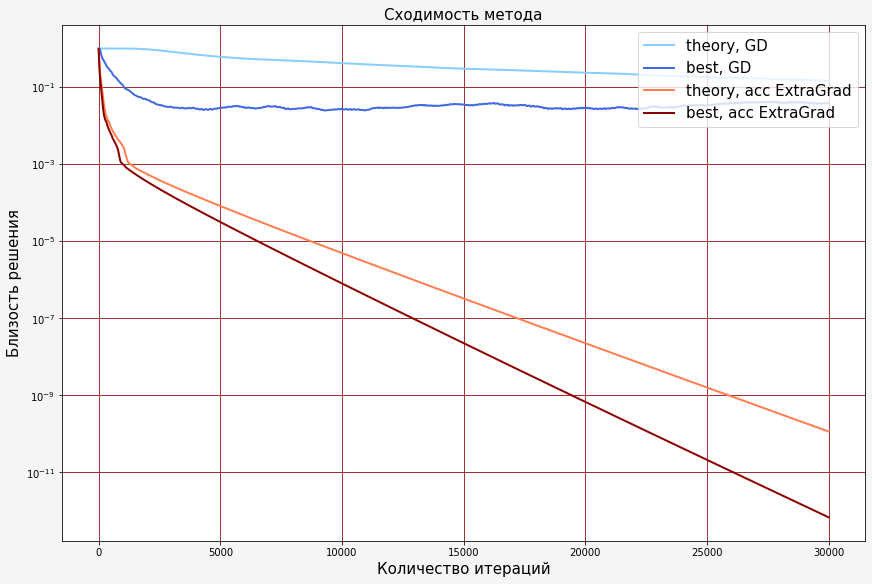

In [8]:
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "whitesmoke")
fig_ax_1 = fg.add_subplot(facecolor = "white")

fig_ax_1.plot(n_gd[::1], x_gd[::1], 'lightskyblue', label = 'theory, GD', linewidth=2)
fig_ax_1.plot(n_gd[::1], y_gd[::1], 'royalblue', label = 'best, GD', linewidth=2)
fig_ax_1.plot(n_aeg[::1], x_aeg[::1], 'coral', label = 'theory, acc ExtraGrad', linewidth=2)
fig_ax_1.plot(n_aeg[::1], y_aeg[::1], 'darkred', label = 'best, acc ExtraGrad', linewidth=2)

fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

### Вывод:
Получили хорошую сходимость экстраградиента, обычный градиентный спуск сходится не очень хорошо.

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

## Сделаем для задачи размера n = 5 (а не 10)

In [9]:
n = 25
theta = 1
d = 25

A = np.ones((n, n))
w = np.random.uniform(1, 40, n)
for i in range(n):
    for j in range(n):
        A[i][j] = w[i] * (1 - np.exp(-theta*(abs(i - j))))

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

В данной статье предлагают использовать проксиальное приближение для решения задачи. Выглядит она  для x как:
\begin{align*}
P_{r_{{\tau - 1}_x}}(\xi_x)_j = \left [ \sum_{i = 1}^n r_{{{\tau - 1}_x}_i} \cdot \exp{- \xi_{x_i}} \right ]^{-1} \cdot r_{{{\tau - 1}_x}_j} e^{-\xi_{x_j}} \\
\end{align*}
Для $y$ будет аналогично. 

In [10]:
start = np.ones(n)/n
def gradient_x(y):
    return A@y

def gradient_y(x):
    return -A.T@x

def prox(r_x, r_y, x_, y_):
    x = r_x * np.exp(-x_) /np.sum(r_x*np.exp(-x_))
    y = r_y * np.exp(-y_) / np.sum((r_y*np.exp(-y_)))
    return x, y

def criteria(x, y):
    cur = np.ones(d) / d
    prev = np.zeros(d)
    while(np.any(cur != prev)):
        prev = cur
        cur = projection(cur + A.T@x)
        max_y = x.T@A@cur

    cur = np.ones(d)/d
    prev = np.zeros(d)
    while(np.any(cur != prev)):
        prev = cur
        cur = projection(cur - A@y)
        min_x = cur.T@A@y
    return max_y - min_x

def projection(v, radius=1):
    n_ = v.shape[0]
    if v.sum() == radius and np.alltrue(v >= 0):
        return v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n_+1) > (cssv - radius))[0][-1]
    theta = float(cssv[rho] - radius) / (rho + 1)
    v = (v - theta).clip(min=0)
    return v

In [11]:
def accelerated_extragradient_2(learn_rate, n_iter):
    x = start
    y = start
    values_y = []
    values_n = []
    for i in range(n_iter):
        grad_x = learn_rate * gradient_x(y)
        grad_y = learn_rate * gradient_y(x)

        w_x, w_y = prox(x, y, grad_x, grad_y)
        grad_x = learn_rate * gradient_x(w_y)
        grad_y = learn_rate * gradient_y(w_x)

        x, y = prox(x, y, grad_x, grad_y)
        values_n.append(i)
        values_y.append(criteria(x, y))
        
    return values_n, values_y, x, y



In [12]:
values_x_aeg_2, values_y_aeg_2, x_aeg_2, y_aeg_2 = accelerated_extragradient_2(1/(8*L), 800)

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

In [13]:
def gradient_descent(learn_rate, n_iter):
    values_y = []
    values_n = []
    x = start
    y = start
    for i in range(n_iter):
        gradientt_x = np.copy(gradient_x(y))
        gradientt_y = np.copy(gradient_y(x))
        
        x = projection(x - learn_rate * gradientt_x)
        y = projection(y + learn_rate * gradientt_y)

        values_n.append(i)
        values_y.append(criteria(x, y))
        
    return values_y, values_n, x, y

def accelerated_extragradient(learn_rate, n_iter):
    values_y = []
    values_n = []
    x = start
    y = start
    gradientt_x = gradient_x(y)
    gradientt_y = gradient_y(x)
    for i in range(n_iter):
        x__ = projection(x - learn_rate * gradientt_x)
        y__ = projection(y + learn_rate * gradientt_y)
        
        gradientt_x = np.copy(gradient_x(y__))
        gradientt_y = np.copy(gradient_y(x__))
        
        x = projection(x - learn_rate * gradientt_x)
        y = projection(y + learn_rate * gradientt_y)
        values_n.append(i)
        values_y.append(criteria(x, y))
        
        #if (i % 10 == 0):
        #    print(i)
    return values_y, values_n, x, y

In [14]:
values_x_gd, values_y_gd, x_gd, y_gd = gradient_descent(40/(L**2), 500)


In [15]:
values_x_aeg_1, values_y_aeg_1, x_aeg_1, y_aeg_1 = accelerated_extragradient(0.1/(L), 260)

In [16]:
#print(y_aeg_2 - x_aeg_2)

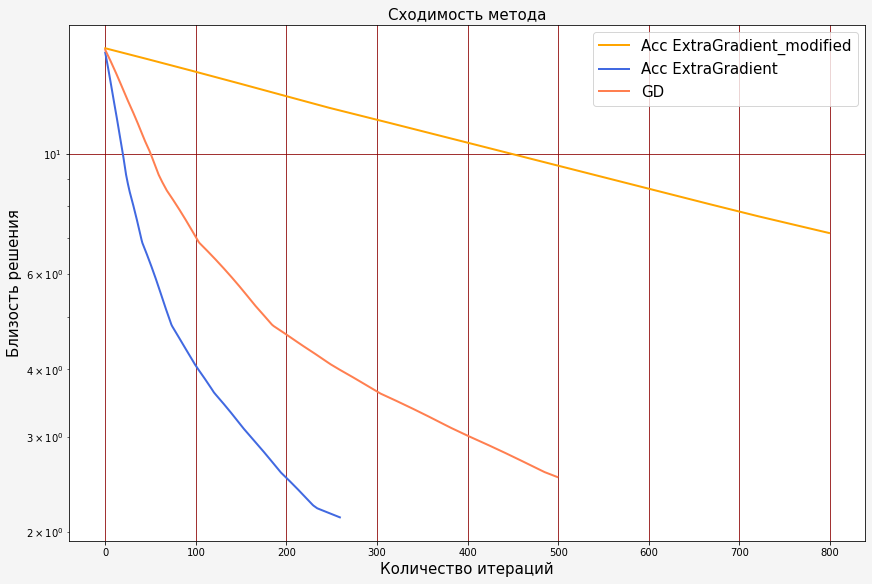

In [17]:
fg = plt.figure(figsize=(12, 8), constrained_layout=True, facecolor = "whitesmoke")
fig_ax_1 = fg.add_subplot(facecolor = "white")

fig_ax_1.plot(values_x_aeg_2[::1], values_y_aeg_2[::1], 'orange', label = 'Acc ExtraGradient_modified', linewidth=2)
fig_ax_1.plot(values_y_aeg_1[::1], values_x_aeg_1[::1], 'royalblue', label = 'Acc ExtraGradient', linewidth=2)
fig_ax_1.plot(values_y_gd[::1], values_x_gd[::1], 'coral', label = 'GD', linewidth=2)

fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

### Вывод:
Наилучшую сходимость показал Accelerated Extragradient, затем обычный градиентный спуск. Наихудший результат - модифицированный экстраградиент

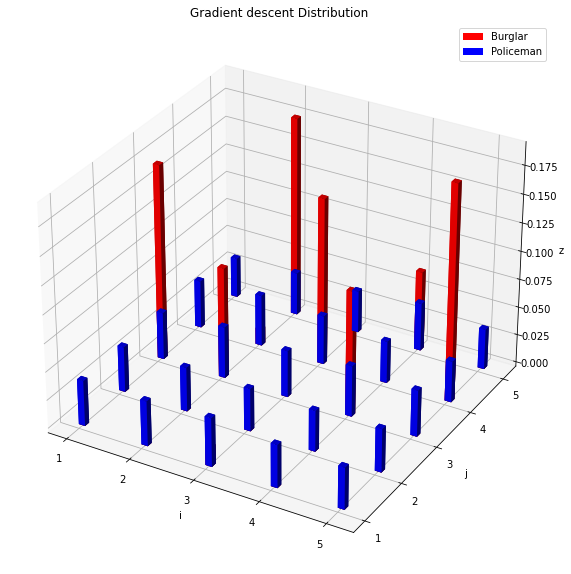

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# создаем фигуру и оси для графика
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
# задаем координаты x, y и z для гистограммы
xpos, ypos = np.meshgrid(np.arange(1, int(sqrt(n)) + 1), np.arange(1, int(sqrt(n)) + 1))
xpos = xpos.flatten()   # преобразование двумерных массивов в одномерные
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz1 = x_gd
dz2 = y_gd
#print(x_gd)

# преобразуем массивы xpos и ypos в одномерные массивы
xpos = xpos.flatten()
ypos = ypos.flatten()

#print(len(xpos), len(ypos), len(np.zeros_like(dz1)))
# создаем гистограмму
ax.bar3d(xpos, ypos, np.zeros_like(dz1), 0.1, 0.1, dz1, color='r', label = 'Burglar')
b1 = plt.Rectangle((0, 0), 1, 1, fc="r")
ax.bar3d(xpos, ypos, np.zeros_like(dz2), 0.1, 0.1, dz2, color='b', label = 'Policeman')
b2 = plt.Rectangle((0, 0), 1, 1, fc="b")
ax.legend([b1, b2], ['Burglar', 'Policeman'])



# создаем гистограмму
#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')

# задаем названия осей и заголовок
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('z')
ax.set_title('Gradient descent Distribution')

# показываем график
plt.show()


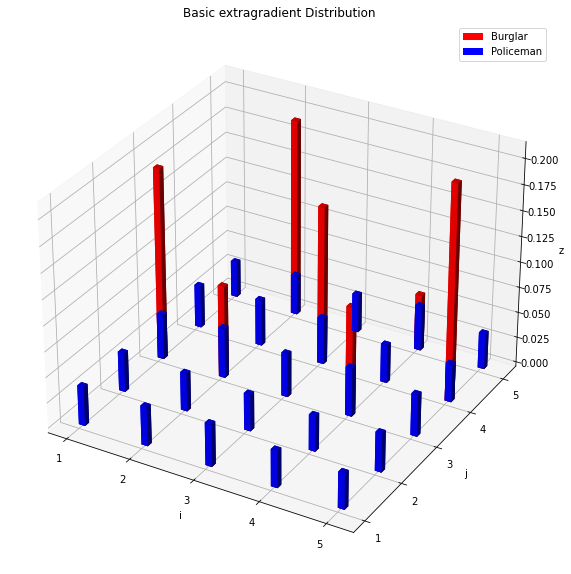

In [19]:

# создаем фигуру и оси для графика
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# задаем координаты x, y и z для гистограммы
xpos, ypos = np.meshgrid(np.arange(1, int(sqrt(n)) + 1), np.arange(1, int(sqrt(n)) + 1))
xpos = xpos.flatten()   # преобразование двумерных массивов в одномерные
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz1 = x_aeg_1
dz2 = y_aeg_1
#print(x_gd)

# преобразуем массивы xpos и ypos в одномерные массивы
xpos = xpos.flatten()
ypos = ypos.flatten()

#print(len(xpos), len(ypos), len(np.zeros_like(dz1)))
# создаем гистограмму
ax.bar3d(xpos, ypos, np.zeros_like(dz1), 0.1, 0.1, dz1, color='r', label = 'Burglar')
b1 = plt.Rectangle((0, 0), 1, 1, fc="r")
ax.bar3d(xpos, ypos, np.zeros_like(dz2), 0.1, 0.1, dz2, color='b', label = 'Policeman')
b2 = plt.Rectangle((0, 0), 1, 1, fc="b")
ax.legend([b1, b2], ['Burglar', 'Policeman'])



# создаем гистограмму
#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')

# задаем названия осей и заголовок
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('z')
ax.set_title('Basic extragradient Distribution')

# показываем график
plt.show()


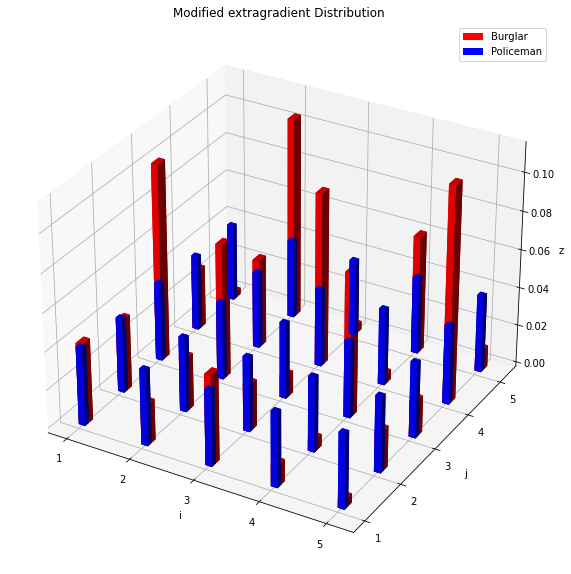

In [20]:

# создаем фигуру и оси для графика
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# задаем координаты x, y и z для гистограммы
xpos, ypos = np.meshgrid(np.arange(1, int(sqrt(n)) + 1), np.arange(1, int(sqrt(n)) + 1))
xpos = xpos.flatten()   # преобразование двумерных массивов в одномерные
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz1 = x_aeg_2
dz2 = y_aeg_2
#print(x_gd)

# преобразуем массивы xpos и ypos в одномерные массивы
xpos = xpos.flatten()
ypos = ypos.flatten()

#print(len(xpos), len(ypos), len(np.zeros_like(dz1)))
# создаем гистограмму
ax.bar3d(xpos, ypos, np.zeros_like(dz1), 0.1, 0.2, dz1, color='r', label = 'Burglar')
b1 = plt.Rectangle((0, 0), 1, 1, fc="r")
ax.bar3d(xpos, ypos, np.zeros_like(dz2), 0.1, 0.1, dz2, color='b', label = 'Policeman')
b2 = plt.Rectangle((0, 0), 1, 1, fc="b")
ax.legend([b1, b2], ['Burglar', 'Policeman'])



# создаем гистограмму
#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')

# задаем названия осей и заголовок
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('z')
ax.set_title('Modified extragradient Distribution')

# показываем график
plt.show()


### Вывод:

Самая яркая картина - также как и для графика сходимости - на обычном экстраградиенте. Там показаны явные преимущественные выборы для грабителя. Для полицейского, соответственно, будут предпочтительными те, которые наименее "понравились" грабителю. На остальных получилась картина менее наглядной, то есть у грабителя больше $\pm$ равнозначных вариантов, у полицейского - оставшиеся. 

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [21]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [22]:
#ответ